## Problem Set 5
### MACS 30100, Dr. Evans
### Leoson Hoay

**Importing necessary packages:**

In [21]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from pylab import rcParams
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.interpolate import LSQUnivariateSpline

### Problem 1

**Multinomial logistic regression and cross validation**

**(a)**

In [2]:
wine_df = pd.read_csv('../../../ProblemSets/PS5/data/strongdrink.txt')

In [3]:
wine_df.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine_df.isnull().sum()

cultivar      0
alco          0
malic         0
ash           0
alk           0
magn          0
tot_phen      0
flav          0
nonfl_phen    0
proanth       0
color_int     0
hue           0
OD280rat      0
proline       0
dtype: int64

In [5]:
len(wine_df)

176

In [6]:
# Based on GLMest notebook
X = wine_df[['alco', 'malic', 'tot_phen', 'color_int']]
y = wine_df[['cultivar']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20)

MultLogReg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
MultLogReg.fit(X_train, y_train)

y_pred = MultLogReg.predict(X_test)

print(classification_report(y_test, y_pred))

print(MultLogReg.coef_[0])
print(MultLogReg.coef_[1])
print(MultLogReg.intercept_[0])
print(MultLogReg.intercept_[1])

             precision    recall  f1-score   support

          1       0.87      1.00      0.93        13
          2       1.00      0.90      0.95        21
          3       1.00      1.00      1.00        10

avg / total       0.96      0.95      0.96        44

[ 1.70040338 -0.26560523  1.22389373  0.02275637]
[-1.46804432 -0.33305312  0.66401185 -0.92271223]
-24.010989451507836
22.80244619818977


C:\Users\leoso\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


From the above output, we can observe the coefficients for $\beta_0$, $\beta_1$, $\beta_2$, $\beta_3$, and $\beta_4$. 

In the case of **j = 1**, they are -24.010599930856053, 1.70037198, -0.26560254, 1.22389196, and 0.02276163 respectively.

In the case of **j = 2**, they are 22.80269884324279,-1.46806418, -0.3330545, 0.66401681, and -0.92271401 respectively.

Given the formula that error rate = 1 - precision, we can also conclude that the the precisions for each cultivar category of 1, 2, 3 are **0.13, 0.00, and 0.00** respectively.

In [7]:
wine_df["cultivar"].value_counts()

2    71
1    59
3    46
Name: cultivar, dtype: int64

This model performs most accurately when predicting members of **cultivar categories 2 and 3**. While category 2 has the most number of observations, category 3 actually has the least. In this particular case, it is **not necessary that the category with the most observations gives the most accurate predictions, although the difference between the observation counts might be too minimal to tease out the effect of large numbers - larger datasets tend to produce more precise predictions.**

**(b)**

In [8]:
# Based on Resampling notebook
Xvals = X.values
yvals = y.values
N_loo = Xvals.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvals)
MSE_vec = np.zeros(N_loo)
y_test2 = np.zeros(N_loo)
y_pred2 = np.zeros(N_loo)

for train_index, test_index in loo.split(Xvals):
    X_train, X_test = Xvals[train_index], Xvals[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    y_test2[test_index] = y_test
    MultLogReg = LogisticRegression(multi_class='multinomial',solver='newton-cg')
    MultLogReg.fit(X_train, y_train)
    y_pred = MultLogReg.predict(X_test)
    y_pred2[test_index] = y_pred
    MSE_vec[test_index] = (y_test - y_pred) ** 2

print(MSE_vec.mean())
print('')
print(classification_report(y_test2, y_pred2))

C:\Users\leoso\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.09659090909090909

             precision    recall  f1-score   support

        1.0       0.90      0.93      0.92        59
        2.0       0.91      0.90      0.91        71
        3.0       0.96      0.93      0.95        46

avg / total       0.92      0.92      0.92       176



Given the formula that error rate = 1 - precision, we can conclude that the the precisions for each cultivar category of 1, 2, 3 are **0.10, 0.09, and 0.04** respectively. **The error rate is actually higher compared to that in part (a).**

The estimate for the test MSE is **0.09659090909090909**.

**(c)**

In [9]:
k = 4
kf = KFold(n_splits=k, random_state=10, shuffle=True)
kf.get_n_splits(Xvals)

MSE_vec_kf = np.zeros(k)
y_test3 = np.array([])
y_pred3 = np.array([])
k_ind = int(0)
for train_index, test_index in kf.split(Xvals):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = Xvals[train_index], Xvals[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    y_test3 = np.append(y_test3, y_test)
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_predx = LogReg.predict(X_test)
    y_pred3 = np.append(y_pred3, y_predx)
    MSE_vec_kf[k_ind] = ((y_test - y_predx) ** 2).mean()
    print('MSE for set', k_ind, ' =', MSE_vec_kf[k_ind])
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test MSE =', MSE_kf)
print('')
print(classification_report(y_test3, y_pred3))

MSE for set 0  = 1.012396694214876
MSE for set 1  = 1.3233471074380165
MSE for set 2  = 1.1611570247933884
MSE for set 3  = 1.0867768595041323
test MSE = 1.1459194214876032

             precision    recall  f1-score   support

        1.0       0.78      0.73      0.75        59
        2.0       0.79      0.85      0.82        71
        3.0       0.96      0.93      0.95        46

avg / total       0.83      0.83      0.83       176



C:\Users\leoso\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Given the formula that error rate = 1 - precision, we can conclude that the the precisions for each cultivar category of 1, 2, 3 are **0.22, 0.21, and 0.04** respectively. **The error rate is even higher compared to that in parts (a) and (b).**

The estimate for the test MSE is **1.1459194214876032**.

### Problem 2

**Splines and interpolation**

**(a)**

In [10]:
cool_df = pd.read_csv('../../../ProblemSets/PS5/data/CoolIndex.txt', header = None)
cool_df.head()

,0,1
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918


In [11]:
cool_df.columns = ['age', 'coolness']
cool_df.head()

,age,coolness
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918


<IPython.core.display.Javascript object>


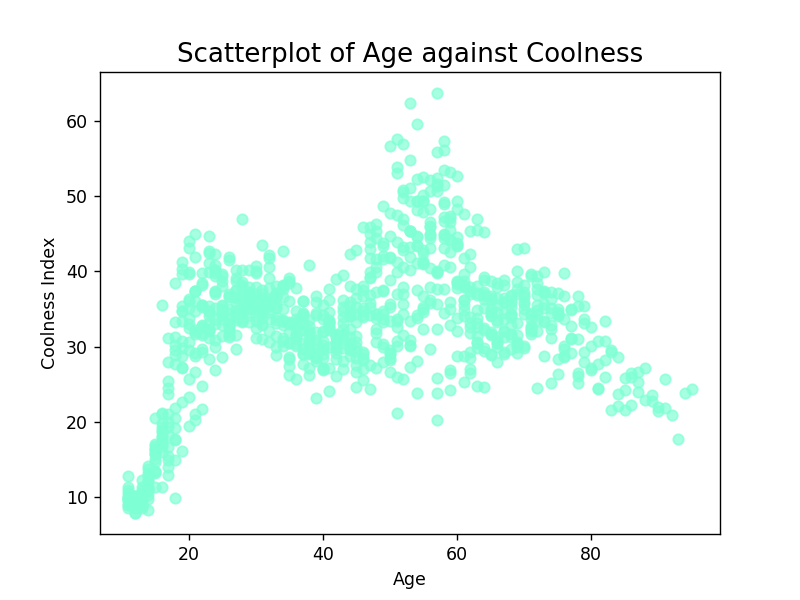

Text(0,0.5,'Coolness Index')

In [12]:
age = cool_df['age']
coolness = cool_df['coolness']
age_vec = np.linspace(age.values.min(), age.values.max(), 1000)

%matplotlib notebook
fig = plt.figure()
plt.scatter(age, coolness, c = 'aquamarine', alpha = 0.7)
plt.title('Scatterplot of Age against Coolness', fontsize = 15)
plt.xlabel('Age')
plt.ylabel("Coolness Index")

**(b)**

In [13]:
age_bin1 = ((age >= 11) & (age < 22)).astype(int)
age_bin2 = ((age >= 22) & (age < 40)).astype(int)
age_bin3 = ((age >= 40) & (age < 59)).astype(int)
age_bin4 = ((age >= 59) & (age < 77)).astype(int)
age_bin5 = ((age >= 77) & (age <= 95)).astype(int)
X_step = pd.DataFrame(dict(age_11_22=age_bin1, age_22_40=age_bin2,
                           age_40_59=age_bin3, age_59_77=age_bin4,
                           age_77_95=age_bin5))

In [14]:
reg = sm.OLS(endog=coolness, exog=X_step, missing='drop')
results = reg.fit()
y_pred4 = results.predict(X_step)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               coolness   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Mon, 19 Feb 2018   Prob (F-statistic):          3.73e-114
Time:                        02:44:42   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age_11_22     20.1025      0.562     35.746      0.0

<IPython.core.display.Javascript object>


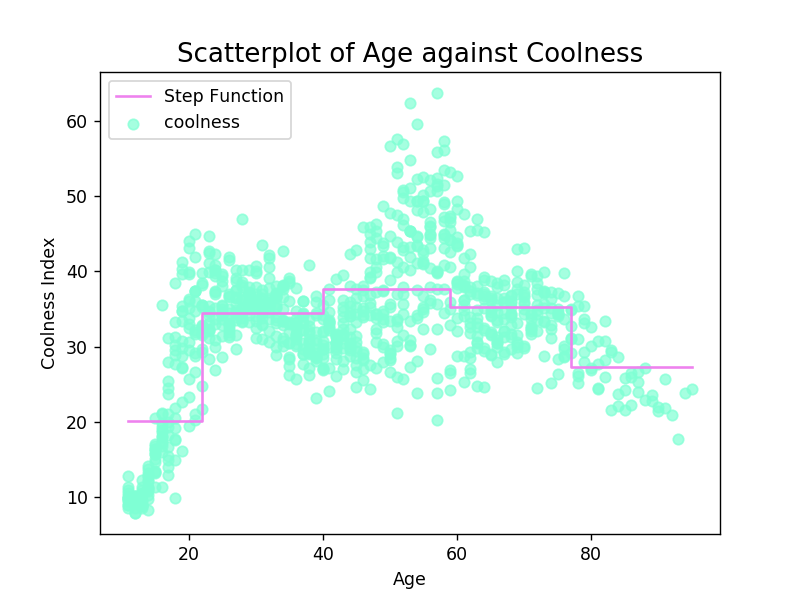

Text(0,0.5,'Coolness Index')

In [15]:
age_steps = np.array([11, 22, 40, 59, 77, 95])
cool_steps = np.append(results.params[0], results.params)
fig2 = plt.figure()
plt.scatter(age, coolness, c = 'aquamarine', alpha = 0.7)
plt.step(age_steps, cool_steps, 'k-', label='Step Function', color = 'violet')
plt.legend(loc='upper left')
plt.title('Scatterplot of Age against Coolness', fontsize = 15)
plt.xlabel('Age')
plt.ylabel("Coolness Index")

In [16]:
b1, b2, b3, b4, b5 = results.params
print(' b1 =', b1, '\n','b2 =', b2, '\n', 'b3 =', b3, '\n', 'b4 =', b4, '\n', 'b5 =', b5)

 b1 = 20.102457252090748 
 b2 = 34.47578807755938 
 b3 = 37.63510549244961 
 b4 = 35.22540004024275 
 b5 = 27.296378244321282


From the output, $\beta_1$, $\beta_1$, $\beta_1$, $\beta_1$, and $\beta_1$, are **20.102457252090744, 34.47578807755937, b3 = 37.635105492449576, 35.22540004024272, and 27.296378244321275** respectively. It follows that the predicted coolness index of a 73-year old is **35.22540004024272**.  

**(c)**

<IPython.core.display.Javascript object>


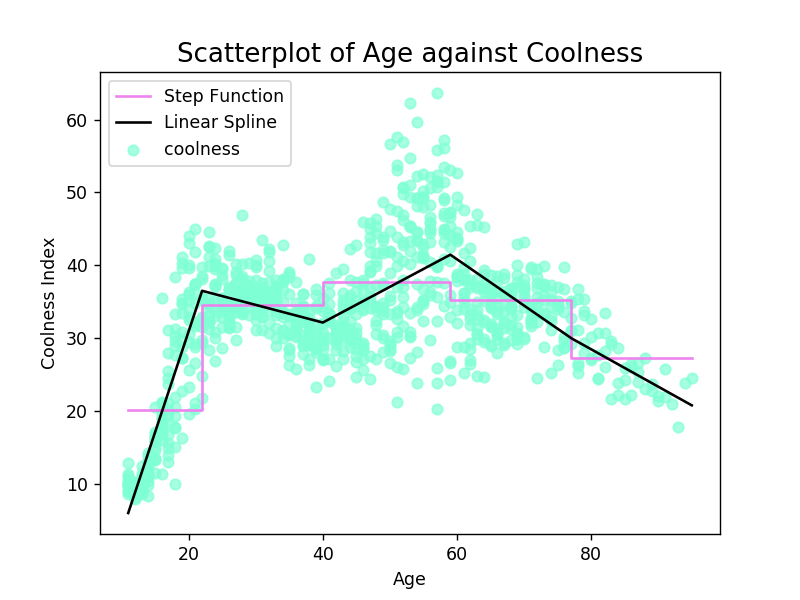

Text(0,0.5,'Coolness Index')

In [17]:
knots = [22, 40, 59, 77]
spline1 = LSQUnivariateSpline(age.values, coolness.values, knots, k=1)
fig3 = plt.figure()
plt.scatter(age, coolness, c = 'aquamarine', alpha = 0.7)
plt.step(age_steps, cool_steps, 'k-', label='Step Function', c = 'violet')
plt.plot(age_vec, spline1(age_vec), 'b-', label='Linear Spline', c = "black")
plt.legend(loc='upper left')
plt.title('Scatterplot of Age against Coolness', fontsize = 15)
plt.xlabel('Age')
plt.ylabel("Coolness Index")

In [18]:
print(spline1(73))

32.536832389143306


The predicted coolness index of a 73-year old in this case is **32.536832389143306**.

**(d)**

<IPython.core.display.Javascript object>


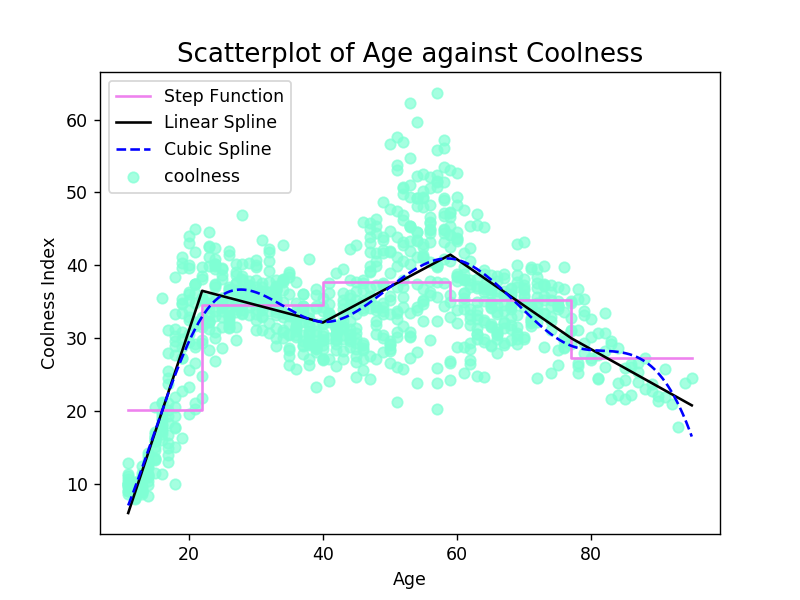

Text(0,0.5,'Coolness Index')

In [19]:
spline2 = LSQUnivariateSpline(age.values, coolness.values, knots, k=3)
fig4 = plt.figure()
plt.scatter(age, coolness, c = 'aquamarine', alpha = 0.7)
plt.step(age_steps, cool_steps, '-', label = 'Step Function', c = "violet")
plt.plot(age_vec, spline1(age_vec), label = 'Linear Spline', c = "black")
plt.plot(age_vec, spline2(age_vec),'--', label = 'Cubic Spline', c = "blue")
plt.legend(loc='upper left')
plt.title('Scatterplot of Age against Coolness', fontsize = 15)
plt.xlabel('Age')
plt.ylabel("Coolness Index")

In [20]:
print(spline2(73))

31.262429389257864


The predicted coolness index of a 73-year old in this case is **31.262429389257864**.